# Advanced Topics in Data Mining - Midterm Project
## Dataset Analysis: 1000 Drugs and Side Effects

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "real_drug_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "palakjain9/1000-drugs-and-side-effects",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
print("\n")
print("First 5 records:\n", df.head())

/tmp/ipython-input-1499742770.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the '1000-drugs-and-side-effects' dataset.


First 5 records:
   Patient_ID  Age  Gender     Condition      Drug_Name  Dosage_mg  \
0      P0001   56    Male     Infection  Ciprofloxacin         50   
1      P0002   69    Male  Hypertension     Metoprolol        500   
2      P0003   46  Female    Depression      Bupropion        100   
3      P0004   32    Male      Diabetes      Glipizide        850   
4      P0005   60    Male    Depression      Bupropion        850   

   Treatment_Duration_days     Side_Effects  Improvement_Score  
0                        9           Nausea                8.5  
1                       24        Tiredness                8.7  
2                       25        Dry mouth                5.4  
3                       44  Low blood sugar                6.4  
4                       35          Anxiety                5.3  


# 1. Calculate basic statistics for all numerical columns: mean, std, min, 25%, median, 75%, and max.

In [2]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(df[numeric_columns].describe())

               Age    Dosage_mg  Treatment_Duration_days  Improvement_Score
count  1000.000000  1000.000000               1000.00000        1000.000000
mean     49.857000   352.650000                 32.38000           7.015200
std      18.114267   295.419617                 15.69809           1.425609
min      18.000000    50.000000                  5.00000           2.500000
25%      35.000000   100.000000                 19.00000           6.100000
50%      50.000000   250.000000                 32.00000           7.000000
75%      66.000000   500.000000                 46.00000           8.000000
max      79.000000   850.000000                 59.00000          10.000000


# 2. Visualize the data in categorical columns with pie charts separately for each column.

In [3]:
df.value_counts()

,,,,,,,,,count
Patient_ID,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score,
P1000,66,Female,Hypertension,Metoprolol,500,58,Tiredness,6.5,1
P0001,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5,1
P0002,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7,1
P0003,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4,1
P0004,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4,1
...,...,...,...,...,...,...,...,...,...
P0013,28,Male,Hypertension,Amlodipine,50,55,Dizziness,4.5,1
P0012,40,Female,Diabetes,Glipizide,500,11,Nausea,6.7,1
P0011,36,Male,Depression,Bupropion,50,23,Headache,6.2,1


Index(['Gender', 'Condition', 'Drug_Name', 'Side_Effects'], dtype='object')


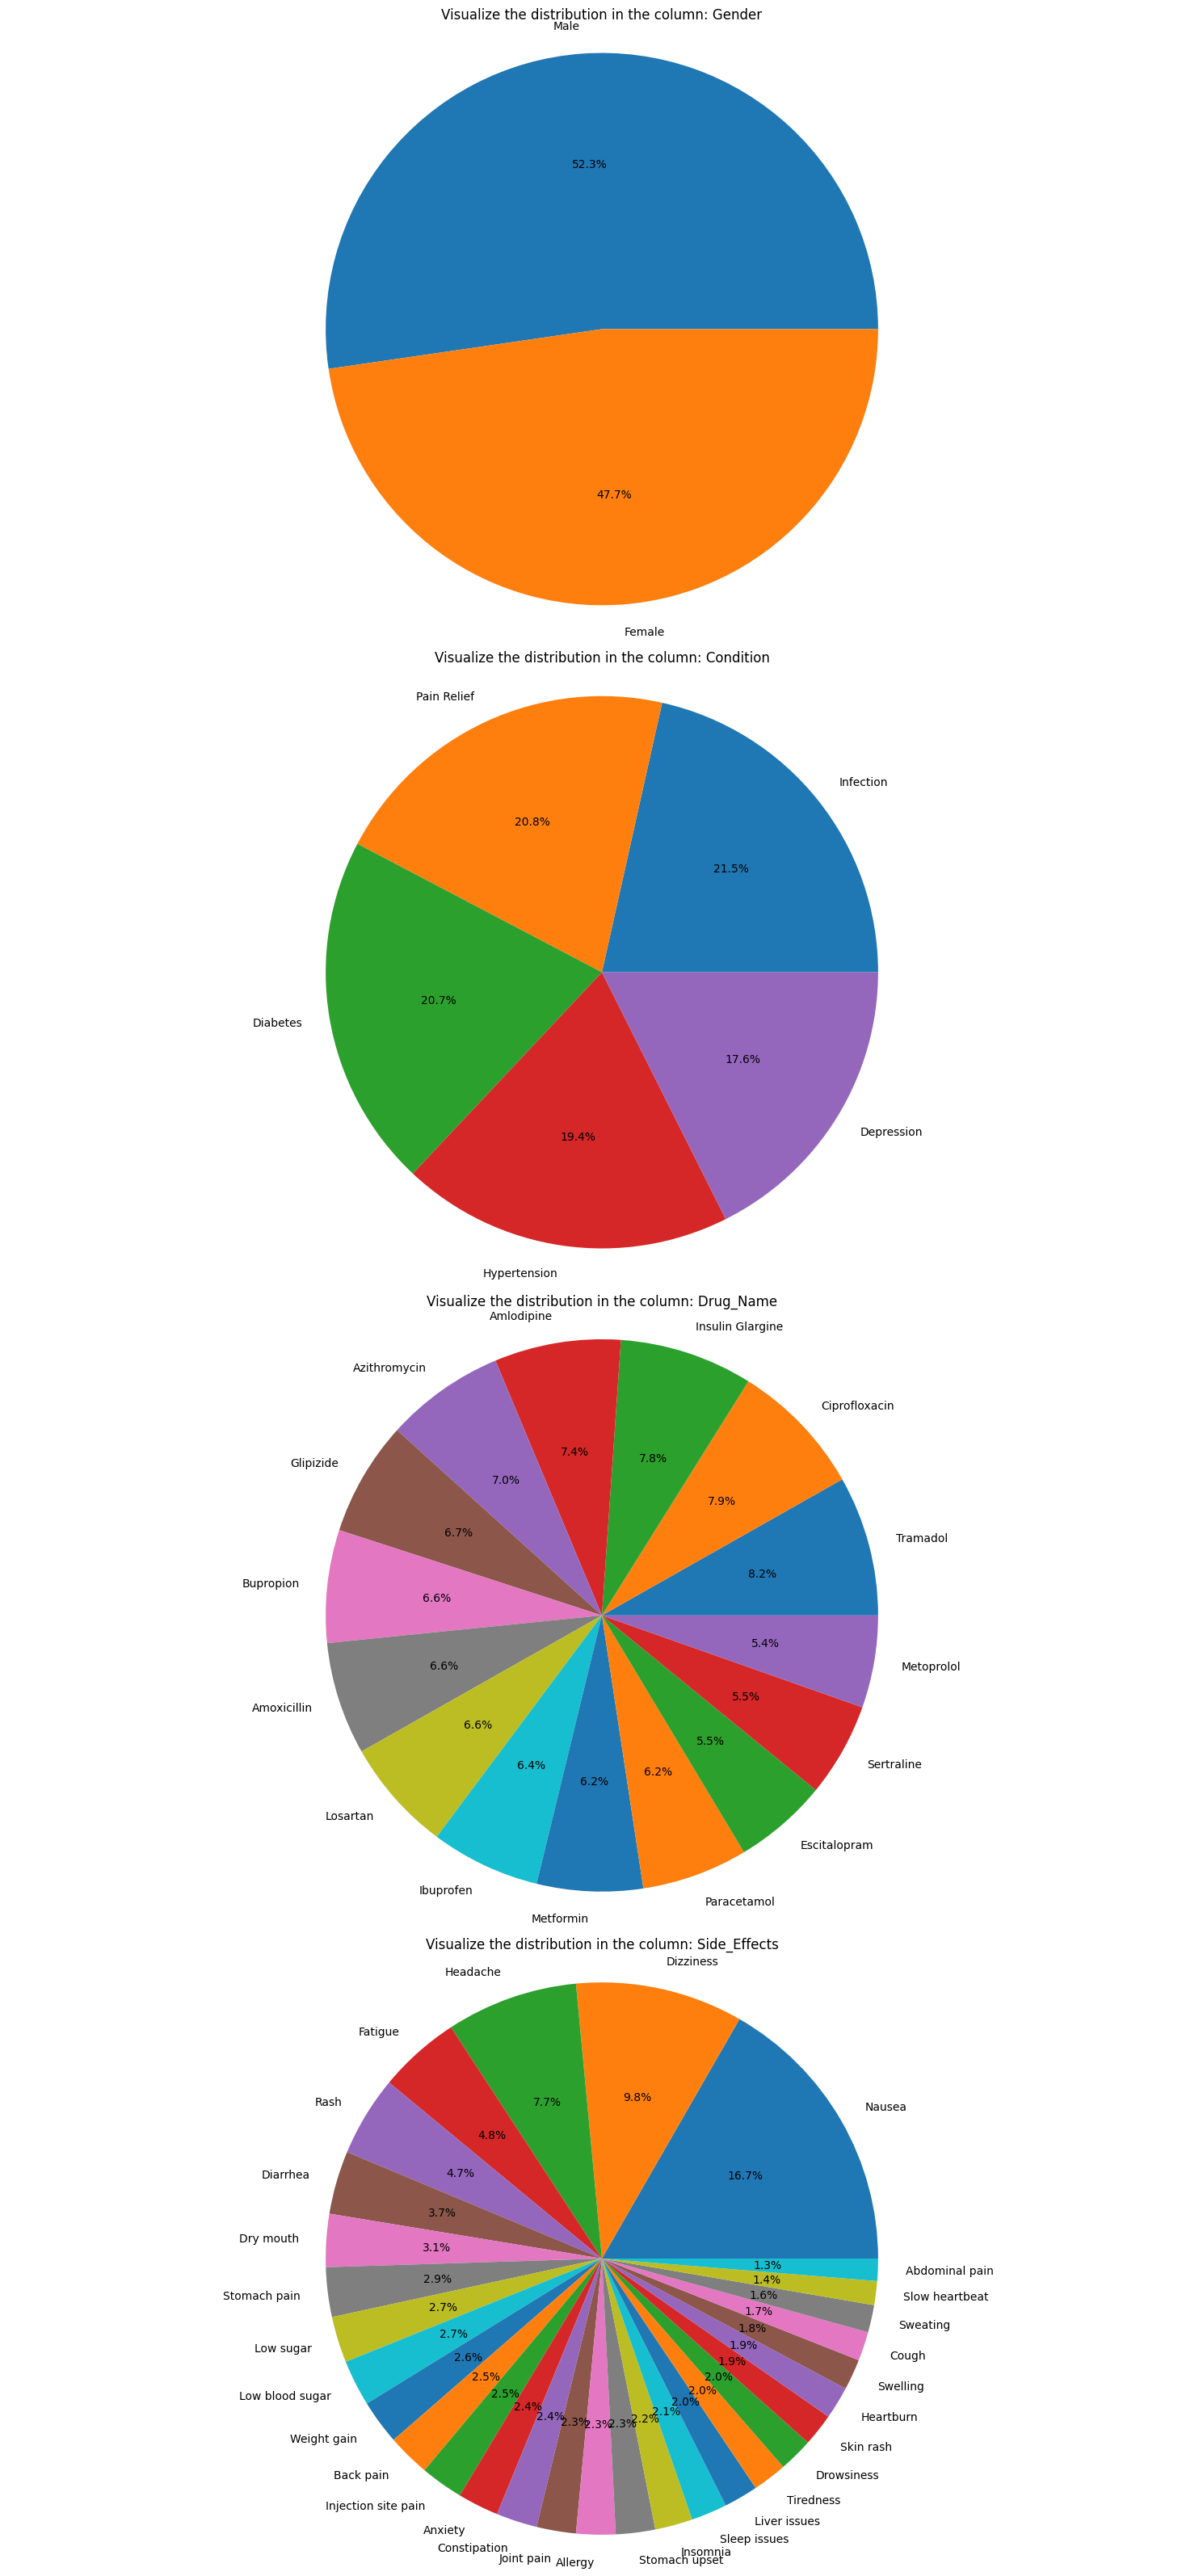

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#search for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Patient_ID')
print(categorical_columns)

plt.figure(figsize=(15, 8 * len(categorical_columns)))
for i, col in enumerate(categorical_columns):
  val_categorical = df[col].value_counts()
  plt.subplot(len(categorical_columns), 1, i+1)
  plt.pie(val_categorical, labels=val_categorical.index, autopct='%1.1f%%')
  plt.title(f"Visualize the distribution in the column: {col}")
  plt.axis('equal')

plt.tight_layout()
plt.show()

# 3. The Condition column contains the disease cause. Visualize the distribution of treatment duration (Treatment_Duration_days) corresponding to these causes on a single boxplot.

Condition
Infection       215
Pain Relief     208
Diabetes        207
Hypertension    194
Depression      176
Name: count, dtype: int64


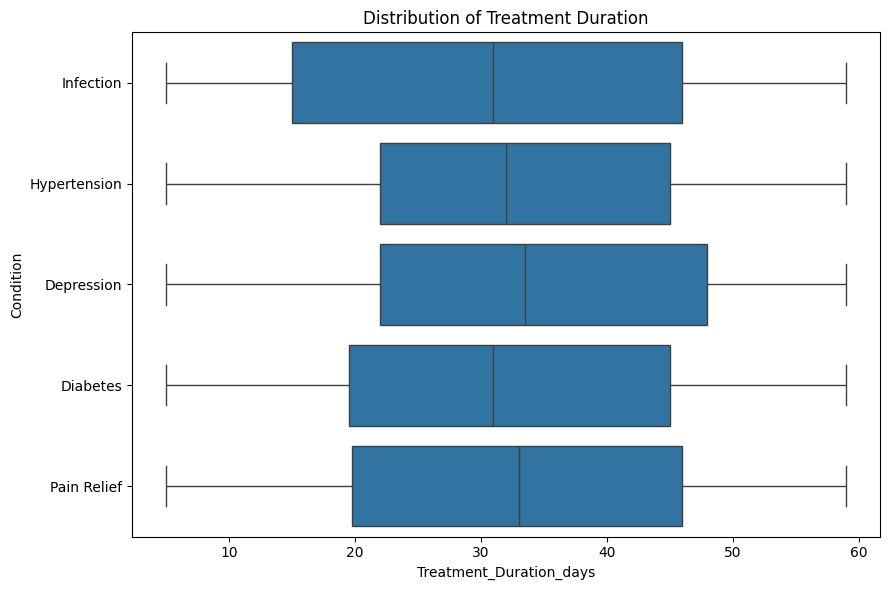

In [5]:
print(df['Condition'].value_counts())

plt.figure(figsize=(9, 6))
sns.boxplot(x=df["Treatment_Duration_days"], y=df["Condition"], native_scale=True)
plt.title('Distribution of Treatment Duration')
plt.tight_layout()
plt.show()

# 4. Draw a 2D histogram (or an appropriate 2D frequency visualization) for the Drug_Name and Side_Effects columns and interpret the results.

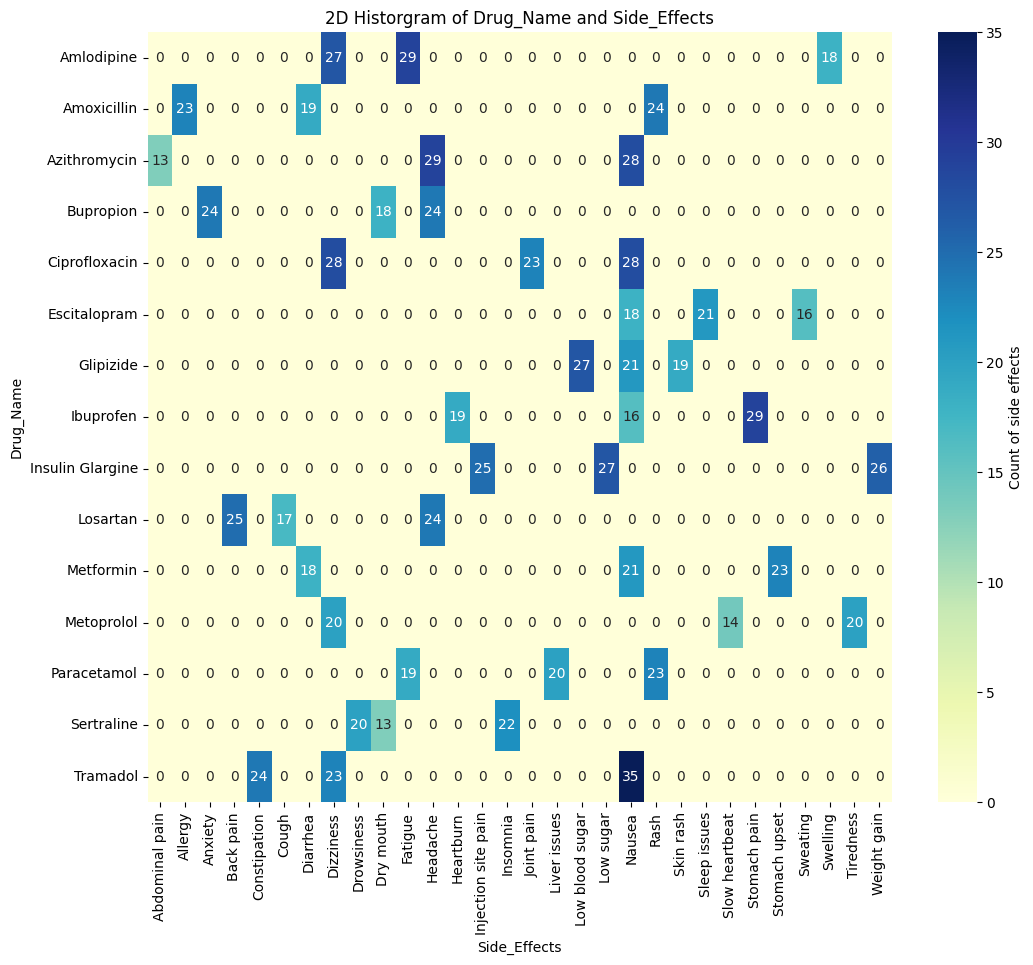

In [6]:
exp_set = df.groupby(['Drug_Name', 'Side_Effects']).size().reset_index(name='Count')

table_exp_set = exp_set.pivot_table(values='Count', index='Drug_Name', columns='Side_Effects', fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(table_exp_set, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count of side effects'})
plt.title('2D Historgram of Drug_Name and Side_Effects')
plt.show()

Interpretation of Results

Y-Axis (Rows): Represents Drug Names (Drug_Name).

X-Axis (Columns): Represents Side Effects (Side_Effects).

Color (Intensity): Shows the frequency (number of reports) of this combination.

Number in Cell (annot=True): This is the actual number of records in the dataset where this pair (Drug, Side Effect) is specified.

Row and Column Analysis: If there are multiple dark-colored cells in a row, the drug is associated with numerous side effects. The number in the cell identifies the side effect. In columns, dark-colored cells appear rarely, which can be interpreted as the effect being specific to certain drugs. Most frequent cell: (Tramadol, Nausea / Tramadol, Nausea)

# 5. For the data you used in the previous question (item 4), perform hierarchical clustering using the clustermap function from the seaborn library. Interpret the resulting graph and write your interpretations in markdown cells.

<Figure size 1000x800 with 0 Axes>

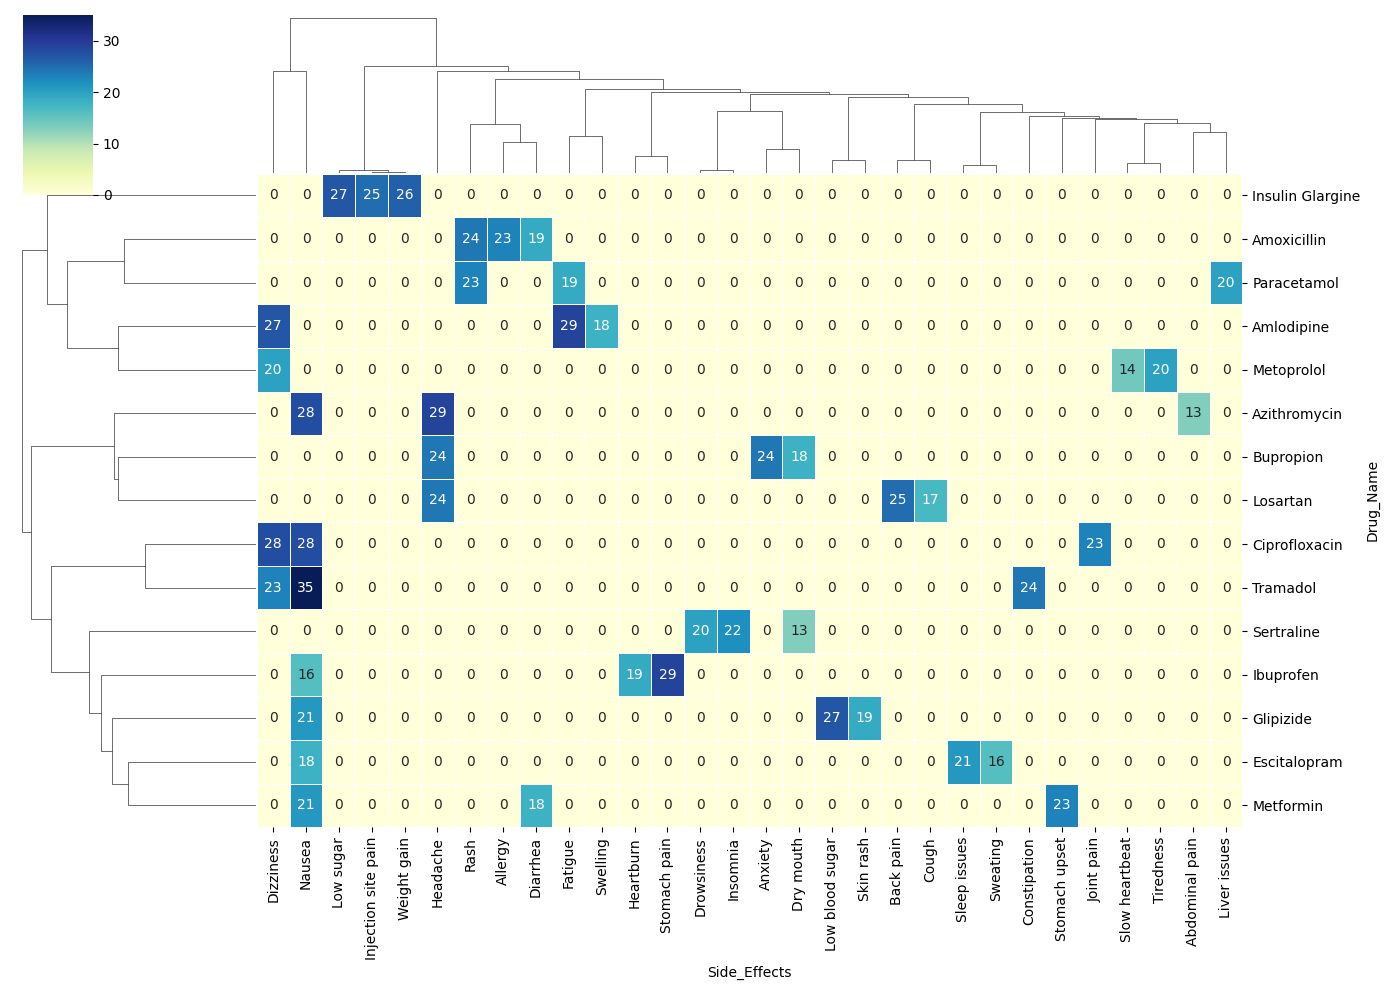

In [7]:
plt.figure(figsize=(10, 8))
sns.clustermap(table_exp_set, method='ward', metric='euclidean', annot=True, cmap='YlGnBu', figsize=(14, 10), linewidths=.5)
plt.show()

Interpretation of Results

The Clustermap tool allows us to find similar effects among drugs.

Row Clustering (Drugs): Metformin and Escitalopram drugs have similar adverse effects on the body.

Column Clustering (Side Effects): The cluster identifies side effects that are common to a specific group of drugs. For example, Low sugar, injection site pain, and Weight gain are symptoms associated with the drug Insulin Glargine.

# 6. Calculate the correlation between Age and Improvement_Score variables and interpret the result.

In [8]:
pre_dataset = df[['Age', 'Dosage_mg',	'Treatment_Duration_days',	'Improvement_Score']]

correlation_calculation = pre_dataset.corr()
print(correlation_calculation)

age_improvement_corr = df[['Age', 'Improvement_Score']].corr().iloc[0,1]
print(f"Correlation between Age and Improvement Score: {age_improvement_corr:.3f}")

                              Age  Dosage_mg  Treatment_Duration_days  \
Age                      1.000000   0.085434                -0.001893   
Dosage_mg                0.085434   1.000000                -0.002883   
Treatment_Duration_days -0.001893  -0.002883                 1.000000   
Improvement_Score        0.010546   0.038349                 0.049440   

                         Improvement_Score  
Age                               0.010546  
Dosage_mg                         0.038349  
Treatment_Duration_days           0.049440  
Improvement_Score                 1.000000  
Correlation between Age and Improvement Score: 0.011


Interpretation of Results

The correlation result between Age and Improvement_Score can be evaluated as very weak (or non-existent). The sign of the coefficient indicates a direct (positive) relationship.

# 7. Calculate the disease (Condition) rates for men and women in a normalized manner. (For example, you can create a probability distribution such that the total for each gender equals 1.)

In [9]:
pre_condition = df.groupby(['Condition', 'Gender']).size()

calc = pre_condition.groupby(['Gender']).apply(lambda x: x / x.sum())
print("Condition distribution by gender (each gender sums to 1):")
print(calc)


Condition distribution by gender (each gender sums to 1):
Gender  Condition     Gender
Female  Depression    Female    0.176101
        Diabetes      Female    0.213836
        Hypertension  Female    0.178197
        Infection     Female    0.238994
        Pain Relief   Female    0.192872
Male    Depression    Male      0.175908
        Diabetes      Male      0.200765
        Hypertension  Male      0.208413
        Infection     Male      0.193117
        Pain Relief   Male      0.221797
dtype: float64


# 8. For which drugs has the side effect of dizziness been reported? Sort these drugs by descending frequency.

Drug_Name
Ciprofloxacin       28
Amlodipine          27
Tramadol            23
Metoprolol          20
Bupropion            0
Azithromycin         0
Amoxicillin          0
Glipizide            0
Escitalopram         0
Ibuprofen            0
Insulin Glargine     0
Metformin            0
Losartan             0
Paracetamol          0
Sertraline           0
Name: Side_Effects, dtype: int64


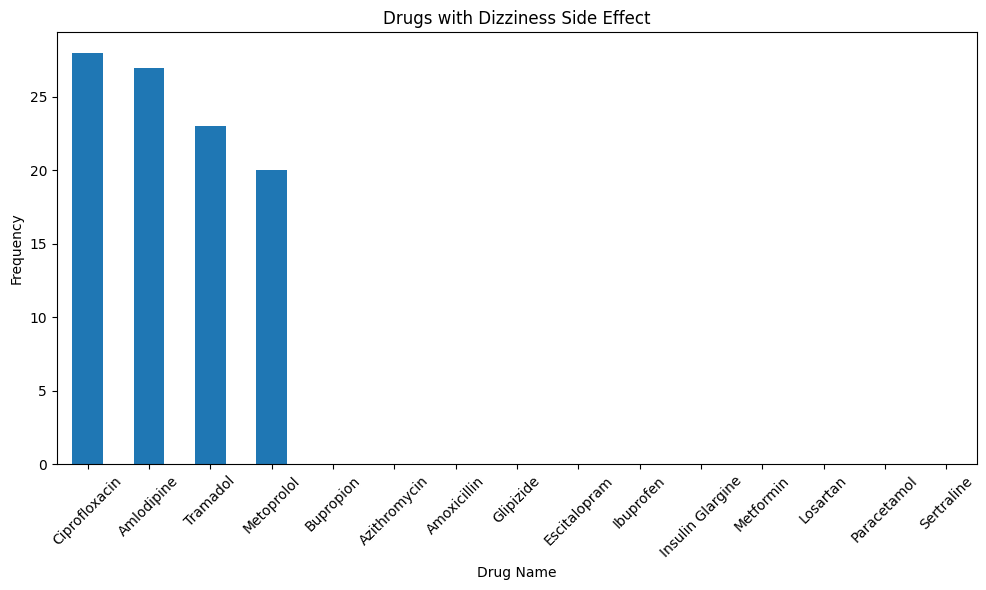

In [10]:
sort_result = df.groupby('Drug_Name')['Side_Effects'].apply(lambda x: x[x == 'Dizziness'].count()).sort_values(ascending=False)
print(sort_result)

plt.figure(figsize=(10, 6))
sort_result.plot(kind='bar')
plt.title('Drugs with Dizziness Side Effect')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. For the drug Metoprolol, calculate the probability of the Dizziness side effect relative to other side effects (the proportion of Dizziness among all side effects reported for Metoprolol).

In [11]:
#Count how many times Metoprolol was prescribed.
#Count how many of those had "Dizziness" as a side effect.
#Divide the number of Dizziness cases by the total number of Metoprolol cases.

pred_metoprolol = df.loc[(df.Drug_Name == 'Metoprolol') & (df.Side_Effects == 'Dizziness')].value_counts().sum() / df.loc[df.Drug_Name == 'Metoprolol'].value_counts().sum()
print("Dizziness cases:",df.loc[(df.Drug_Name == 'Metoprolol') & (df.Side_Effects == 'Dizziness')].value_counts().sum())
print("Total Metoprolol:", df.loc[df.Drug_Name == 'Metoprolol'].value_counts().sum())
print(f"Probability: {pred_metoprolol:.2%}")

Dizziness cases: 20
Total Metoprolol: 54
Probability: 37.04%


The probability of Dizziness in patients taking Metoprolol is approximately 37.04%